In [1]:
!source ../venv_analysis/bin/activate

In [2]:
import torch
from torch import nn
import numpy as np

In [3]:
torch.cuda.is_available()

True

In [4]:
conv = nn.Conv2d(1, 64, 7, 2, bias=False)

In [5]:
m = torch.randn(1, 913, 480)

In [6]:
t = conv(m)

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


In [7]:
t.shape

torch.Size([64, 454, 237])

In [8]:
mp = nn.MaxPool2d(3, stride=2)

In [9]:
t2 = mp(t)

In [10]:
t2.shape

torch.Size([64, 226, 118])

In [11]:
import pdsp_resnet_pt

In [12]:
stage2 = pdsp_resnet_pt.Stage2NBlock((226, 118), 64, 128)

In [13]:
t2 = t2.reshape(1, *t2.shape)

In [14]:
s2 = stage2(t2)

In [15]:
s2.shape

torch.Size([1, 128, 113, 59])

In [16]:
c1x1 = stage2.conv_1x1(t2)

In [17]:
c1x1.shape

torch.Size([1, 128, 113, 59])

In [18]:
stage2_same = pdsp_resnet_pt.Stage2NBlock((226, 118), 64, 64)

In [19]:
s2s = stage2_same(t2)

In [20]:
s2s.shape

torch.Size([1, 64, 226, 118])

In [21]:
t2.shape

torch.Size([1, 64, 226, 118])

In [22]:
pool = nn.AvgPool2d((226,118))

In [23]:
pool(t2).shape

torch.Size([1, 64, 1, 1])

In [24]:
f = nn.Flatten()(pool(t2))

In [25]:
f.shape


torch.Size([1, 64])

In [26]:
seblock = pdsp_resnet_pt.SEBlock((226, 118), 64, 16)

In [27]:
seb2 = seblock(t2)

In [28]:
seb2.shape

torch.Size([1, 64, 226, 118])

In [29]:
#ones = torch.ones((1,64,4,4))

In [30]:
#(seb2.reshape((1,64, 1, 1)) * ones)[0][1]

In [31]:
t2.shape

torch.Size([1, 64, 226, 118])

In [32]:
block_2 = pdsp_resnet_pt.NBlock(3, (226, 118), 64, 64)

In [33]:
b2 = block_2(t2)

In [34]:
b2.shape

torch.Size([1, 64, 226, 118])

In [35]:
block_3 = pdsp_resnet_pt.NBlock(3, (226, 118), 64, 128)

In [36]:
b3 = block_3(b2)

In [37]:
b3.shape

torch.Size([1, 128, 113, 59])

In [38]:
nf = [1,1,2]

In [39]:
a = [1, *nf]

In [40]:
a

[1, 1, 1, 2]

In [41]:
m.shape

torch.Size([1, 913, 480])

In [42]:
# pdsp_res = pdsp_resnet_pt.SEResnetPDSP(ntimes=500)

In [43]:
m = m.reshape((1, *m.shape))

In [44]:
m.shape

torch.Size([1, 1, 913, 480])

In [45]:
# pdsp_res.stage3n_shapes[0]

In [46]:
import matplotlib.pyplot as plt, matplotlib

In [47]:
import process_hits

In [48]:
# pdsp_data = process_hits.PDSPData('pdsp_hits.h5')

In [49]:
# plane = pdsp_data.make_plane(2)

In [50]:
# matplotlib.rcParams['figure.figsize'] = [10, 20]

In [51]:
# plt.imshow(plane, cmap='jet')

In [52]:
loss_fn = nn.CrossEntropyLoss()

In [53]:
pd_data = process_hits.PDSPData('/home/calcuttj/save_hits/to_upload/linked.h5', maxtime=500, linked=True)

Added 4 events from link0
Added 5 events from link1
Added 8 events from link10
Added 7 events from link100
Added 7 events from link1000
Added 6 events from link10000
Added 6 events from link10001
Added 6 events from link10002
Added 6 events from link10003
Added 5 events from link10004
Added 5 events from link10005
Added 7 events from link10006
Added 6 events from link10007
Added 7 events from link10008
Added 7 events from link10009
Added 5 events from link1001
Added 6 events from link10010
Added 7 events from link10011
Added 4 events from link10012
Added 5 events from link10013
Added 6 events from link10014
Added 3 events from link10015
Added 5 events from link10016
Added 5 events from link10017
Added 6 events from link10018
Added 8 events from link10019
Added 3 events from link1002
Added 5 events from link10020
Added 4 events from link10021
Added 6 events from link10022
Added 5 events from link10023
Added 5 events from link10024
Added 2 events from link10025
Added 7 events from link10

In [54]:
pd_data.load_truth();

Added 4 truths from link0
Added 5 truths from link1
Added 8 truths from link10
Added 7 truths from link100
Added 7 truths from link1000
Added 6 truths from link10000
Added 6 truths from link10001
Added 6 truths from link10002
Added 6 truths from link10003
Added 5 truths from link10004
Added 5 truths from link10005
Added 7 truths from link10006
Added 6 truths from link10007
Added 7 truths from link10008
Added 7 truths from link10009
Added 5 truths from link1001
Added 6 truths from link10010
Added 7 truths from link10011
Added 4 truths from link10012
Added 5 truths from link10013
Added 6 truths from link10014
Added 3 truths from link10015
Added 5 truths from link10016
Added 5 truths from link10017
Added 6 truths from link10018
Added 8 truths from link10019
Added 3 truths from link1002
Added 5 truths from link10020
Added 4 truths from link10021
Added 6 truths from link10022
Added 5 truths from link10023
Added 5 truths from link10024
Added 2 truths from link10025
Added 7 truths from link10

In [55]:
pd_data.clean_events()

In [56]:
#pdsp_resnet_pt.train(pdsp_res, loss_fn, optimizer, pd_data, batchsize=16)

In [57]:
plane2_net = pdsp_resnet_pt.SEResnetPDSP_Plane2(nfilters=[128,192,256])

In [58]:
optimizer = torch.optim.SGD(plane2_net.parameters(), lr=0.001, momentum=0.9)

In [59]:
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.001)

In [60]:
torch.cuda.is_available()

True

In [61]:
plane2_net.to('cuda')

SEResnetPDSP_Plane2(
  (stage1): Stage1Block(
    (layers): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
      (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (stage2): NBlock(
    (layers): Sequential(
      (0): Stage2NBlock(
        (layers): Sequential(
          (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
          (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
          (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU()
          (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
          (6): SEBlock(
            (layers): Sequential(
              (0): AvgPool2d(kernel_size=(123, 118), stride=(123, 118), padding=0)
              (1): Flatten(start_dim=1, end_dim=-1)
              (2): Linear(in_features=64, out_feat

In [62]:
torch.cuda.empty_cache()

In [63]:
import h5py as h5

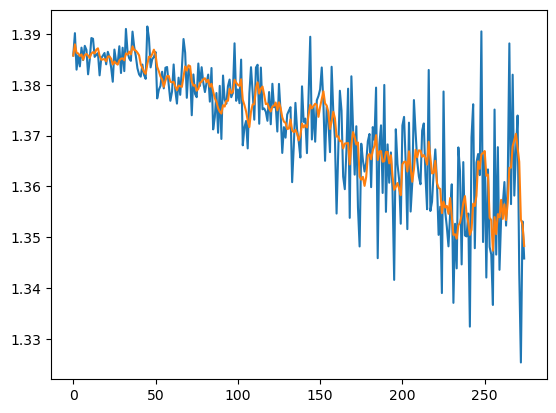

loss: 1.345831  [ 8768/29214]


In [ ]:
import matplotlib.pyplot as plt
import IPython
%matplotlib inline
pdsp_resnet_pt.train(plane2_net, loss_fn, optimizer, pd_data, plane2=True, validate=True, batchsize=32, epochs=8, savename='losses_2_23_23_8epochs.h5', scheduler=scheduler)

In [ ]:
h5in = h5.File('losses.h5')

In [ ]:
np.array(h5in['epochal_avg_loss'])

In [ ]:
np.array(h5in['validation_losses'])

In [ ]:
out = plane2_net(torch.from_numpy(plane).float())

In [ ]:
out.shape

In [ ]:
pd_data.get_event(0)

In [ ]:
# pd_data.topos[0]

In [ ]:
target = torch.LongTensor([2])
target2 = torch.Tensor([[0., 0., 1., 0.]])

In [ ]:
loss_fn(out, target)

In [ ]:
loss_fn(out, target2)

In [ ]:
n_less = 0; n_more = 0;
for k, ne in pd_data.k_nevents.items():
    nt = pd_data.k_ntruths[k]
    if ne != nt:
        print(k, ne, nt)
        if ne < nt: n_more += 1
        elif ne > nt: n_less += 1

In [ ]:
n_less

In [ ]:
for x, y in pd_data.get_training_batches(batchsize=2, maxbatches=2):
    print(x.shape)
    print(y.shape)
for x, y in pd_data.get_training_batches(batchsize=2, maxbatches=2):
    print(x.shape)
    print(y.shape)

In [ ]:
pd_data.nevents - int(pd_data.nevents*.9)